In [38]:
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [39]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

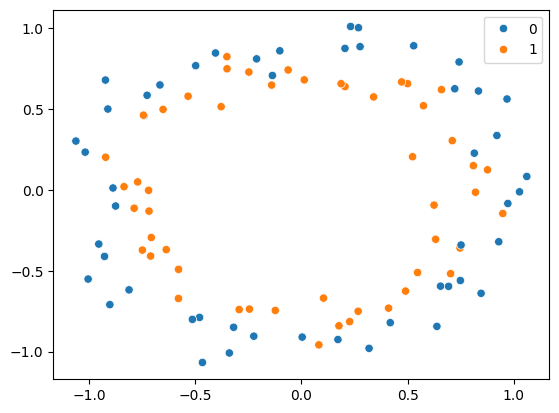

In [40]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [42]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

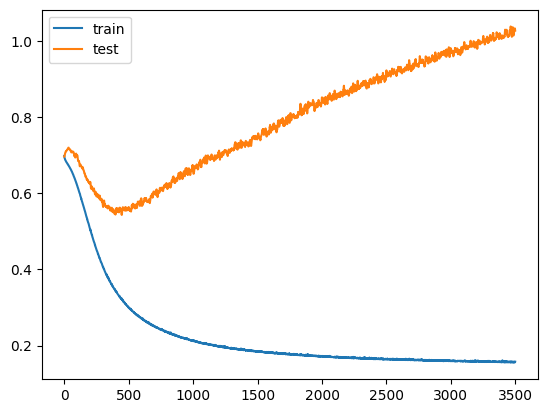

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Early Stopping

In [46]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu')) #256 is the number of neurons
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5102 - loss: 0.6920 - val_accuracy: 0.4000 - val_loss: 0.7100
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5484 - loss: 0.6920 - val_accuracy: 0.4000 - val_loss: 0.7092
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5766 - loss: 0.6879 - val_accuracy: 0.4000 - val_loss: 0.7110
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5703 - loss: 0.6889 - val_accuracy: 0.4000 - val_loss: 0.7126
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5625 - loss: 0.6880 - val_accuracy: 0.4500 - val_loss: 0.7136
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5641 - loss: 0.6850 - val_accuracy: 0.4000 - val_loss: 0.7145
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5625 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.7150
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5703 - loss: 0.6867 - val_accuracy: 0.4000 - v

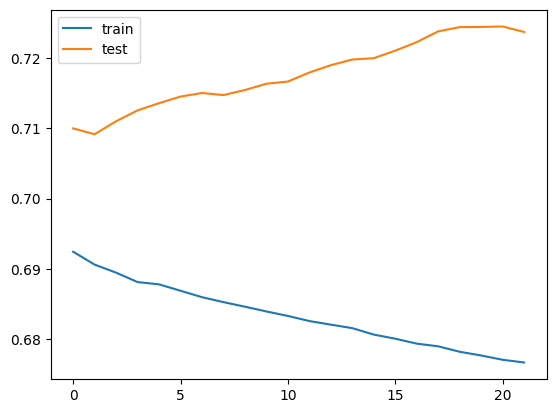

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 523us/step


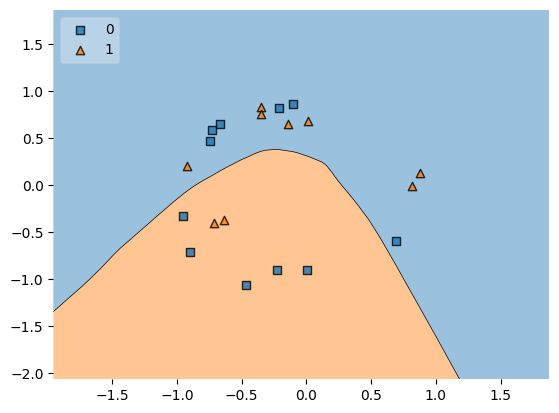

In [51]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()